# Train model on an imbalanced dataset

In [43]:
#Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
#training model fuctions
def Sigmoid(z):
    return 1.0/(1+np.exp(-z))
def Predict(x,w):
    z = np.dot(x, w)
    return Sigmoid(z)
def cost_function(features, labels, weights):
    n = len(labels)
    predictions = Predict(features, weights)
    cost_class1 = -np.log(predictions)*labels
    cost_class2 = -np.log(1-predictions)*(1-labels)
    cost = cost_class1 + cost_class2
    return cost.sum()/n
def update_weight(features, labels, weights, learning_rate):
    n = len(labels)
    predictions = Predict(features, weights)
    gradient = np.dot(features.T, predictions-labels)
    gradient /= n
    gradient *= learning_rate
    weights = weights - gradient
    return weights
def train(features, labels, weights, learning_rate, iter):
    cost_history = []
    for i in range(iter):
        weights = update_weight(features, labels, weights, learning_rate)
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)
    return weights, cost_history
#Normalized data function
def Scale_data(data):
    data.age=scale(data.age)
    data.trestbps=scale(data.trestbps)
    data.chol=scale(data.chol)
    data.thalach=scale(data.thalach)
    data.oldpeak=scale(data.oldpeak)
    return data
def Predict_target(predictions):
    for i in range(len(predictions)):
        if predictions[i] >= 0.5:
            predictions[i] = 1
        else:
            predictions[i] = 0
    return predictions

### Generate data

In [44]:
data = pd.read_csv('heart.csv')

In [45]:
positive = data.loc[data.target==1]
negative = data.loc[data.target==0]

#### Dataset consist of randomly 100 positive samples and 349 negative samples 

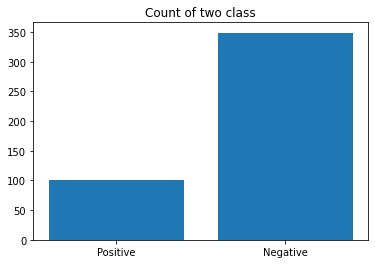

In [46]:
pos_train = positive.sample(n=100)
neg_train = negative.sample(n=349)
data_train = pd.concat([neg_train, pos_train])
labels = data_train.target.to_numpy()
data_train["bias"]=np.ones(449)
target_values = {"Positive": len(data_train.loc[data_train.target==1]), "Negative": len(data_train.loc[data_train.target==0])}
fig, ax = plt.subplots()
ax.bar(target_values.keys(), target_values.values())
ax.set(title="Count of two class")
data_train=data_train.drop(['target'], axis=1)

### Train model and predict 

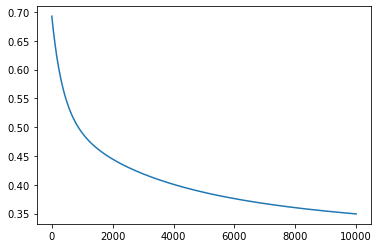

In [47]:
weights = np.zeros([14], float)
cost_history = []
weights, cost_history = train(Scale_data(data_train).to_numpy(), labels, weights, 0.0005, 10000)
#Visualize cost history
plt.plot(cost_history)

[Text(0.5, 1.0, 'Predictions of data test')]

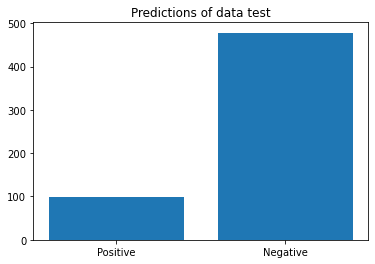

In [62]:
data_test = data.drop(labels=data_train.index, axis = 0)
data_test["bias"]=np.ones(len(data_test))
labels_of_datatest = data_test.target.to_numpy()
data_test = data_test.drop(['target'], axis=1)
predictions_of_datatest = Predict(Scale_data(data_test).to_numpy(), weights)
predictions_of_datatest = Predict_target(predictions_of_datatest)
target_values = {"Positive": np.count_nonzero(predictions_of_datatest==1), "Negative": np.count_nonzero(predictions_of_datatest==0)}
fig, ax = plt.subplots()
ax.bar(target_values.keys(), target_values.values())
ax.set(title="Predictions of data test")

In [49]:
def Confusion_matrix(predictions, labels):
    True_Pos = True_Neg = False_Neg = False_Pos = 0
    for i in range(len(labels)):
        if predictions[i]==labels[i]==1:
            True_Pos+=1
        elif predictions[i]==1 and labels[i]==0:
            False_Pos+=1
        elif predictions[i]==0 and labels[i]==1:
            False_Neg+=1
        elif predictions[i]==labels[i]==0:
            True_Neg+=1
    return True_Pos, True_Neg, False_Neg, False_Pos
def Evaluation_metrics(True_Pos, True_Neg, False_Neg, False_Pos):
    accuracy =(True_Pos+True_Neg)/(True_Pos+ True_Neg+ False_Neg+ False_Pos)
    precision = True_Pos/(True_Pos+False_Pos)
    recall = True_Pos/(True_Pos+False_Neg)
    F1_score = (2*precision*recall)/(precision+recall)
    return accuracy, precision, recall, F1_score
def Visualize_confusion_matrix(Confusion_matrix):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(Confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(Confusion_matrix.shape[0]):
        for j in range(Confusion_matrix.shape[1]):
            ax.text(x=j, y=i,s=Confusion_matrix[i, j], va='center', ha='center', size='xx-large')
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)

In [50]:
True_Pos, True_Neg, False_Neg, False_Pos = Confusion_matrix(predictions_of_datatest, labels_of_datatest)
accuracy, precision, recall, F1_score = Evaluation_metrics(True_Pos, True_Neg, False_Neg, False_Pos)

In [51]:
pos_test = positive.drop(labels=pos_train.index, axis =0)
neg_test = negative.drop(labels=neg_train.index, axis=0)
n2_pos = len(pos_test)
n2_neg = len(neg_test)
Conf_matrix = np.array([[round(True_Neg/n2_neg,2),round(False_Pos/n2_neg,3)],[round(False_Neg/n2_pos,3), round(True_Pos/n2_pos,2)]])

### Evaluation metrics of data test

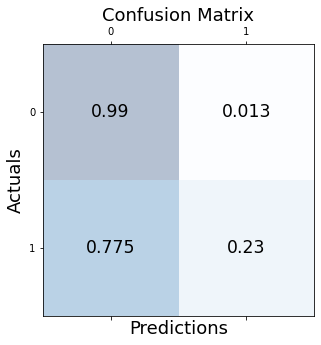

In [52]:
Visualize_confusion_matrix(Conf_matrix)

In [53]:
accuracy_2, precision_2, recall_2, F1_score_2 

(0.4270833333333333, 0.98, 0.2300469483568075, 0.3726235741444867)

### Comment:
Because of the data imbalance, accuracy is only 0.42 and F1_score is only 0.37.
Specifically, the dataset has three times as many negative samples as positive samples. As a result, the rate of True Negative samples is almost 100% and the rate of False Positive is almost 0%
